<a href="https://colab.research.google.com/github/data-better/RBOK/blob/main/RBOK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. R의 소개

* 무료로 사용하는 데이터분석 소프트웨어 : R, Python
* R의 설치 : https://r-project.org
* R 개발환경 : Rstudio / Python 개발환경 : anaconda 
* 클라우드 기반 쥬피터 노트북 : 구글 Colab



## 2. 구글 Colab

* 구글 id가 있어야 이용 가능, 구글 drive 이용
* 텍스트와 코드로 구성 
  - 텍스트 작성 : 마크다운
  - 코드 수행 : Crtl+Enter, Shift+Enter, Alt+Enter 
* 크롬 브라우저에서 Python과 R을 실행 : R은 임시
  - 설치 필요하지 않음
  - GPU 무료 액세스
* Pyhon 기반 : https://colab.research.google.com/
* R : https://colab.research.google.com/notebook#create=true&language=r

## 3. R의 특징
  * Colab 환경 검토 : R.Version()
  * 설치된 library : library()
  * 설치된 data    : data()


In [ ]:
R.Version()

In [ ]:
library()

In [ ]:
help(package='base')

In [ ]:
data()

In [ ]:
?Syntax

In [ ]:
options()

## 4. R 기초

In [ ]:
# 계산과 변수 지정

1+2
a = 10
b <- 2
a+b

[1] 3

[1] 12

In [ ]:
# 데이터 형태
a1 = c(1,2,5)
print(a1)
b1 <- c(1,2, 'aa', TRUE)
print(b1)
c1 <- matrix(1:12, 4,3)
print(c1)

[1] 1 2 5
[1] "1"    "2"    "aa"   "TRUE"
     [,1] [,2] [,3]
[1,]    1    5    9
[2,]    2    6   10
[3,]    3    7   11
[4,]    4    8   12


## 5. 데이터 읽어오기

In [91]:
library(tidyverse)

In [92]:
dataq = read_csv("https://raw.githubusercontent.com/data-better/RBOK/main/data/BOK_DATA_Q.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  date = col_character(),
  cp_sa = col_double(),
  gdp_sa = col_double(),
  cp = col_double(),
  gdp = col_double(),
  ipi = col_double(),
  ipi_sa = col_double(),
  conpi = col_double(),
  conpi_sa = col_double(),
  sbi = col_double(),
  sbi_sa = col_double(),
  pubpi = col_double(),
  pubpi_sa = col_double(),
  cpi = col_double(),
  cpi_core = col_double(),
  ur_sa = col_double(),
  ur = col_double()
)




In [93]:
dataq = dataq %>% 
  mutate( gdp_sa_p = (gdp_sa - lag(gdp_sa)) / lag(gdp_sa) * 100,
          cp_sa_p  = (cp_sa - lag(cp_sa)) / lag(cp_sa) * 100,
          cp_sa_p  = (cp_sa - lag(cp_sa)) / lag(cp_sa) * 100,
          gdp_p    = (gdp    - lag(gdp, 4)) / lag(gdp, 4) * 100,
          cpi_p    = (gdp    - lag(cpi, 4)) / lag(cpi, 4) * 100
          )
dataq

date,cp_sa,gdp_sa,cp,gdp,ipi,ipi_sa,conpi,conpi_sa,sbi,⋯,pubpi,pubpi_sa,cpi,cpi_core,ur_sa,ur,gdp_sa_p,cp_sa_p,gdp_p,cpi_p
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1985<b3><e2> 1<bf><f9>,42683.1,66553.4,42258.9,60797.6,NA,NA,NA,NA,NA,⋯,NA,NA,30.78,32.87,NA,NA,NA,NA,NA,NA
1985<b3><e2> 4<bf><f9>,43705.5,68156.6,42763.8,67581.3,NA,NA,NA,NA,NA,⋯,NA,NA,31.06,33.17,NA,NA,2.40889271,2.395327,NA,NA
1985<b3><e2> 7<bf><f9>,44810.9,68932.0,43786.4,70487.5,NA,NA,NA,NA,NA,⋯,NA,NA,31.31,33.52,NA,NA,1.13767412,2.529201,NA,NA
1985<b3><e2> 10<bf><f9>,45531.6,71033.5,47922.0,75809.0,NA,NA,NA,NA,NA,⋯,NA,NA,31.47,33.61,NA,NA,3.04865665,1.608314,NA,NA
1986<b3><e2> 1<bf><f9>,46475.9,72401.2,45987.1,66339.3,NA,NA,NA,NA,NA,⋯,NA,NA,31.89,33.98,NA,NA,1.92542955,2.073944,9.114998,215427.3
1986<b3><e2> 4<bf><f9>,47668.1,75222.8,46774.0,74470.3,NA,NA,NA,NA,NA,⋯,NA,NA,32.07,34.43,NA,NA,3.89717298,2.565200,10.193648,239662.7
1986<b3><e2> 7<bf><f9>,49008.9,78470.3,47897.1,80269.2,NA,NA,NA,NA,NA,⋯,NA,NA,32.16,34.86,NA,NA,4.31717511,2.812783,13.877212,256269.2
1986<b3><e2> 10<bf><f9>,50083.4,79694.3,52578.2,84709.8,NA,NA,NA,NA,NA,⋯,NA,NA,31.93,34.83,NA,NA,1.55982582,2.192459,11.741086,269076.4
1987<b3><e2> 1<bf><f9>,50622.8,82253.7,50179.7,76258.2,NA,NA,NA,NA,NA,⋯,NA,NA,32.15,35.02,NA,NA,3.21152203,1.077004,14.951771,239028.9


In [94]:
# dataq_ts = ts(dataq, start=1985, frequency=4)
dataq_ts = dataq %>% ts(start=1985, frequency=4)
dataq_ts

,date,cp_sa,gdp_sa,cp,gdp,ipi,ipi_sa,conpi,conpi_sa,sbi,sbi_sa,pubpi,pubpi_sa,cpi,cpi_core,ur_sa,ur,gdp_sa_p,cp_sa_p,gdp_p,cpi_p
1985 Q1,2,42683.1,66553.4,42258.9,60797.6,NA,NA,NA,NA,NA,NA,NA,NA,30.78,32.87,NA,NA,NA,NA,NA,NA
1985 Q2,3,43705.5,68156.6,42763.8,67581.3,NA,NA,NA,NA,NA,NA,NA,NA,31.06,33.17,NA,NA,2.40889271,2.39532742,NA,NA
1985 Q3,4,44810.9,68932.0,43786.4,70487.5,NA,NA,NA,NA,NA,NA,NA,NA,31.31,33.52,NA,NA,1.13767412,2.52920113,NA,NA
1985 Q4,1,45531.6,71033.5,47922.0,75809.0,NA,NA,NA,NA,NA,NA,NA,NA,31.47,33.61,NA,NA,3.04865665,1.60831405,NA,NA
1986 Q1,6,46475.9,72401.2,45987.1,66339.3,NA,NA,NA,NA,NA,NA,NA,NA,31.89,33.98,NA,NA,1.92542955,2.07394425,9.1149980,215427.3
1986 Q2,7,47668.1,75222.8,46774.0,74470.3,NA,NA,NA,NA,NA,NA,NA,NA,32.07,34.43,NA,NA,3.89717298,2.56520046,10.1936482,239662.7
1986 Q3,8,49008.9,78470.3,47897.1,80269.2,NA,NA,NA,NA,NA,NA,NA,NA,32.16,34.86,NA,NA,4.31717511,2.81278255,13.8772123,256269.2
1986 Q4,5,50083.4,79694.3,52578.2,84709.8,NA,NA,NA,NA,NA,NA,NA,NA,31.93,34.83,NA,NA,1.55982582,2.19245892,11.7410862,269076.4
1987 Q1,10,50622.8,82253.7,50179.7,76258.2,NA,NA,NA,NA,NA,NA,NA,NA,32.15,35.02,NA,NA,3.21152203,1.07700356,14.9517707,239028.9
1987 Q2,11,52067.4,86327.9,51223.7,85822.0,NA,NA,NA,NA,NA,NA,NA,NA,32.85,35.60,NA,NA,4.95321183,2.85365487,15.2432581,267508.4


## 6. 데이터 시각화

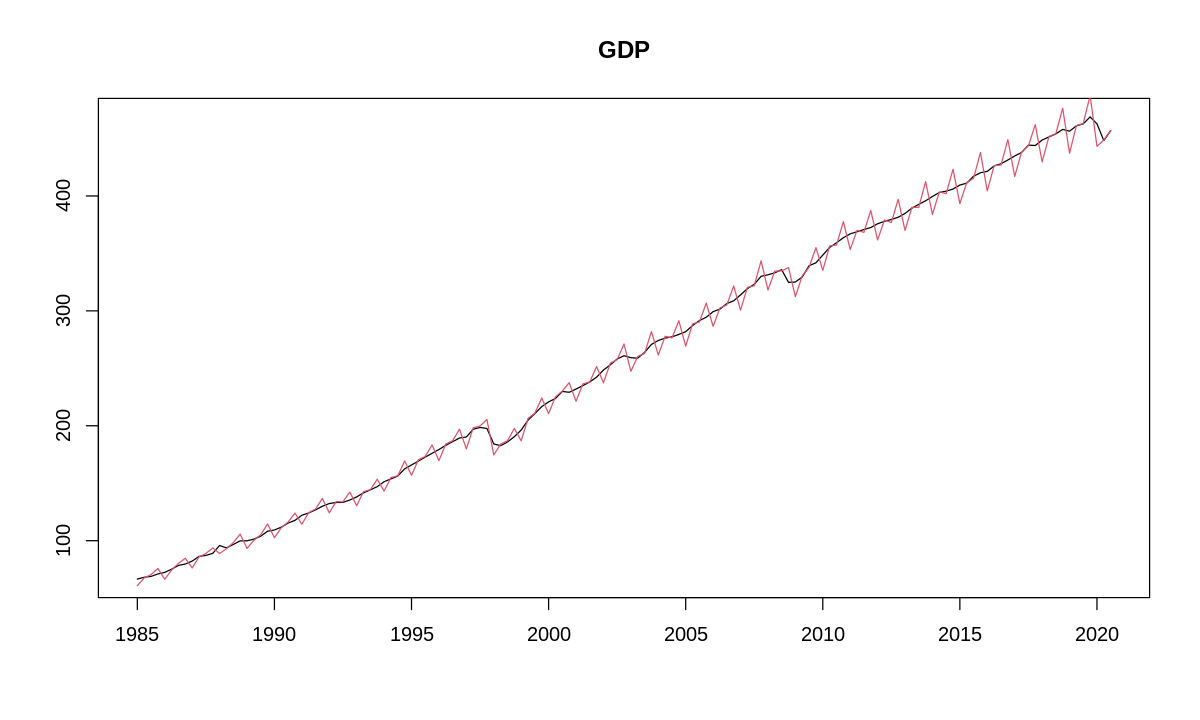

In [95]:
options(repr.plot.width = 10, repr.plot.height = 6)
plot(dataq_ts[,3]/1000, xlab="", ylab="", main="GDP")
 lines(dataq_ts[,5]/1000, col=2)

In [54]:
install.packages("forecast")
library(forecast)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



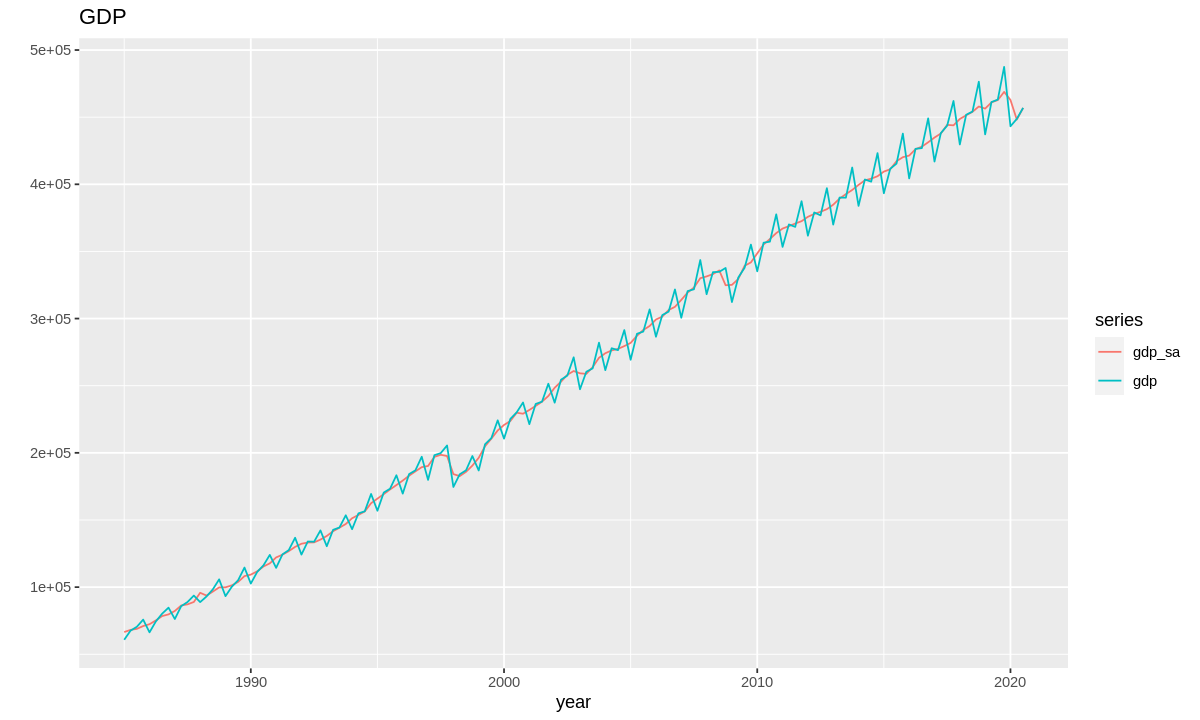

In [57]:
autoplot(dataq_ts[, c(3,5)])+
  ggtitle("GDP") +
  ylab("") +
  xlab("year")

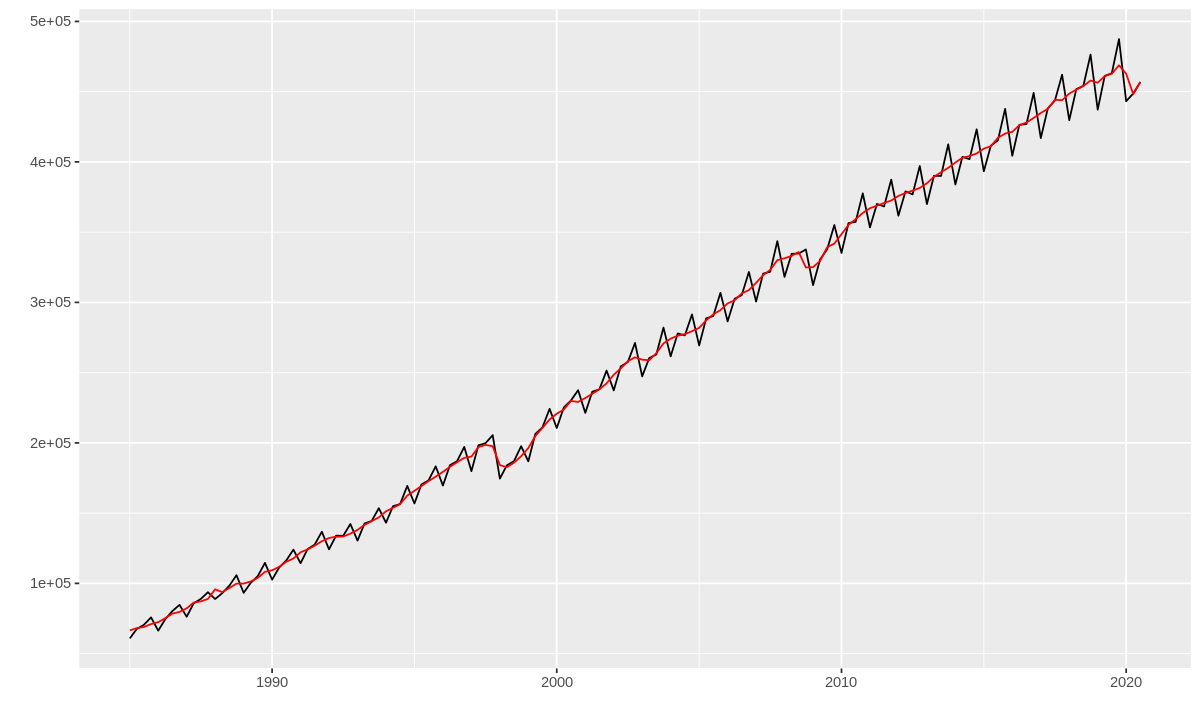

In [58]:
dataq %>% ggplot(aes(date)) +
          geom_line(aes(y=gdp)) +
          geom_line(aes(y=gdp_sa), color="red") +
          labs(x="", y="") 

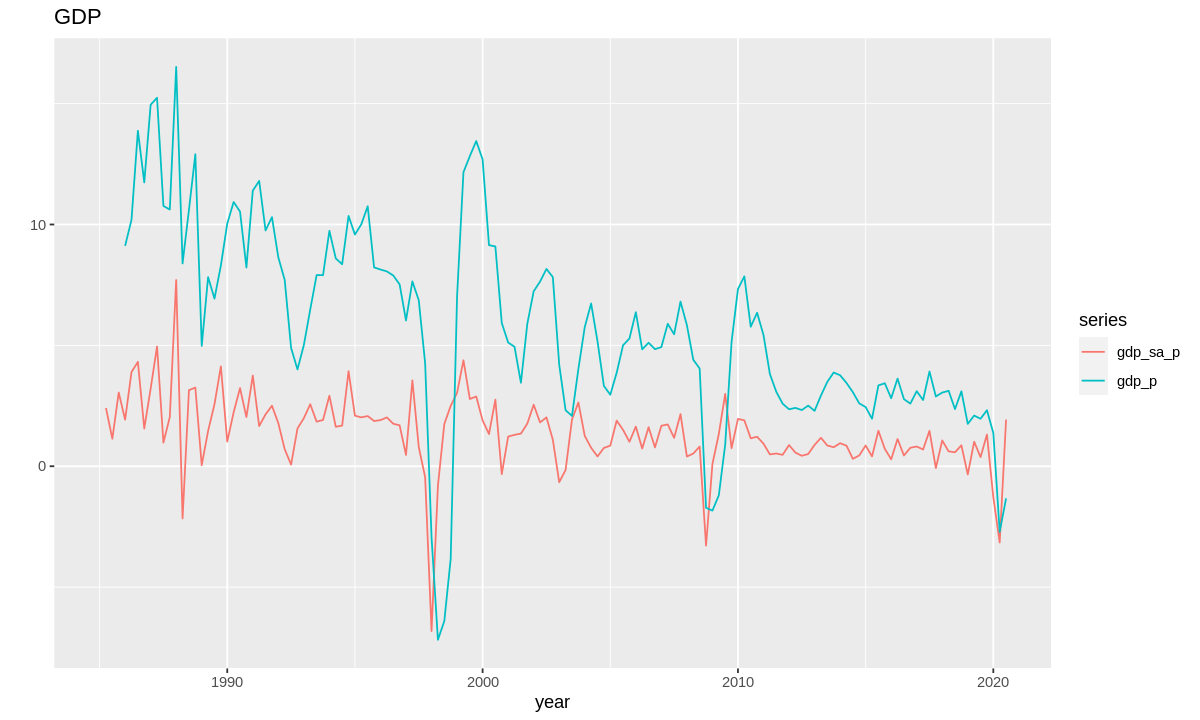

In [59]:
autoplot(dataq_ts[, c(16,17)])+
  ggtitle("GDP") +
  ylab("") +
  xlab("year")

## 7. 시계열의 분해

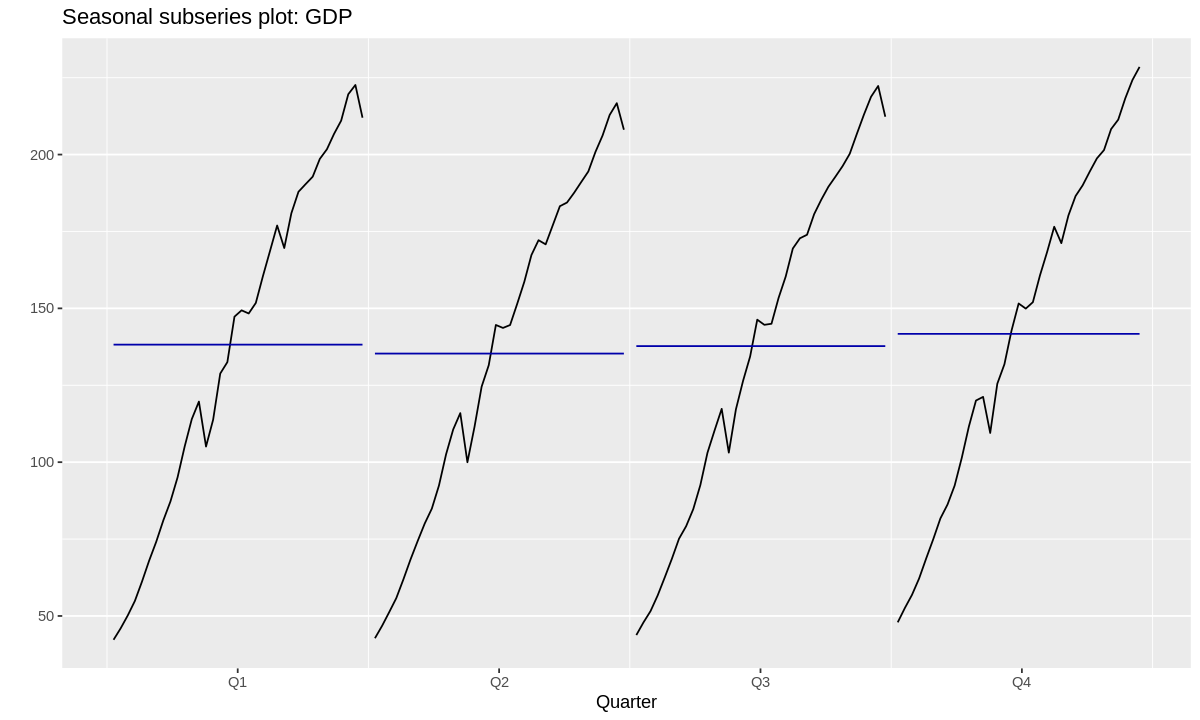

In [62]:
# GDP의 계절성
ggsubseriesplot(dataq_ts[,4]/1000) +
  ylab("") +
  ggtitle("Seasonal subseries plot: GDP")

Warning message:
“Removed 4 row(s) containing missing values (geom_path).”
Warning message:
“Removed 20 row(s) containing missing values (geom_path).”


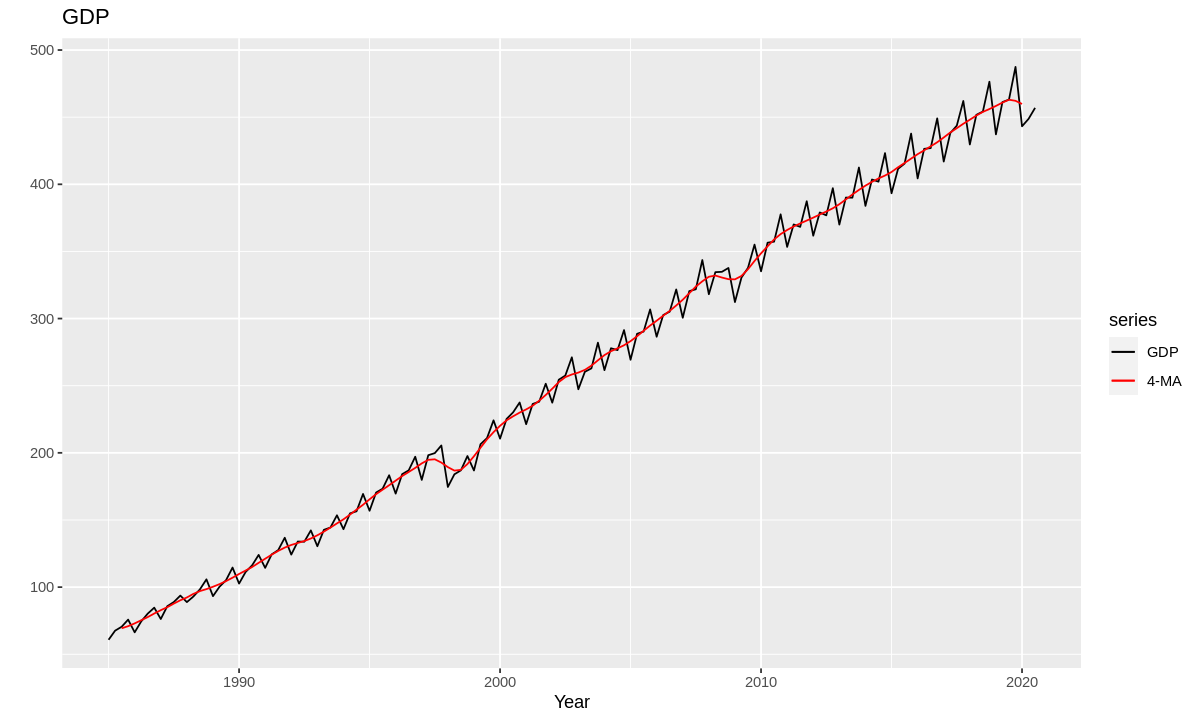

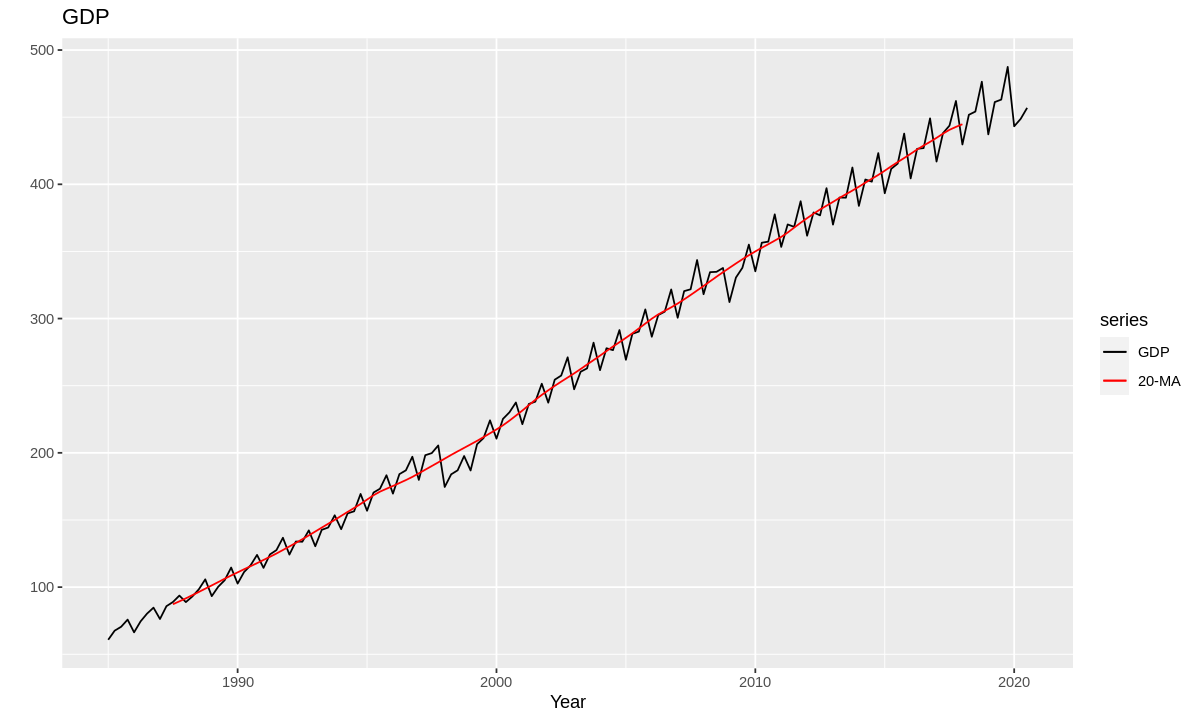

In [63]:
# 4분기 이동평균
GDP_SA = dataq_ts[,3]/1000
GDP = dataq_ts[,5]/1000
autoplot(GDP, series="GDP") +
  autolayer(ma(GDP, 4), series="4-MA") +
  xlab("Year") + ylab("") +
  ggtitle("GDP") +
  scale_colour_manual(values=c("GDP"="black","4-MA"="red"),
                      breaks=c("GDP","4-MA"))
# 40분기 이동평균
autoplot(GDP, series="GDP") +
  autolayer(ma(GDP, 20), series="20-MA") +
  xlab("Year") + ylab("") +
  ggtitle("GDP") +
  scale_colour_manual(values=c("GDP"="black","20-MA"="red"),
                      breaks=c("GDP","20-MA"))

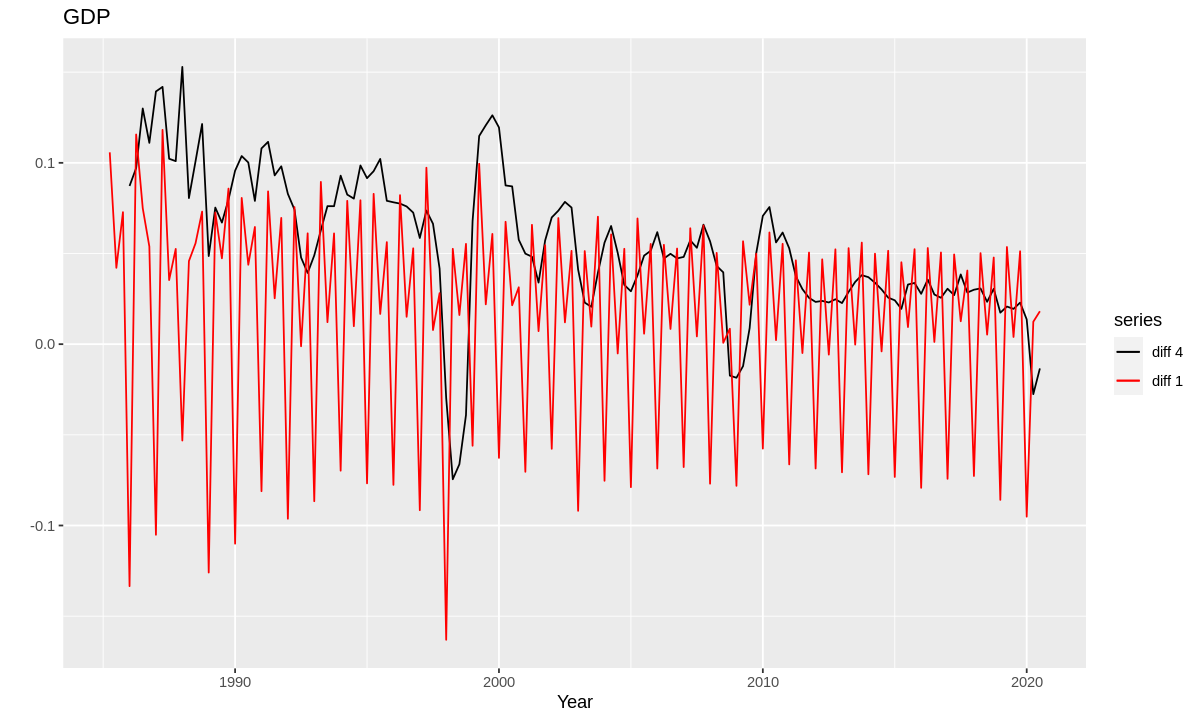

In [64]:
# 차분
autoplot(diff(log(GDP),4), series="diff 4") +
  autolayer(diff(log(GDP)), series="diff 1") +
  xlab("Year") + ylab("") +
  ggtitle("GDP") +
  scale_colour_manual(values=c("diff 4"="black","diff 1"="red"),
                      breaks=c("diff 4","diff 1"))

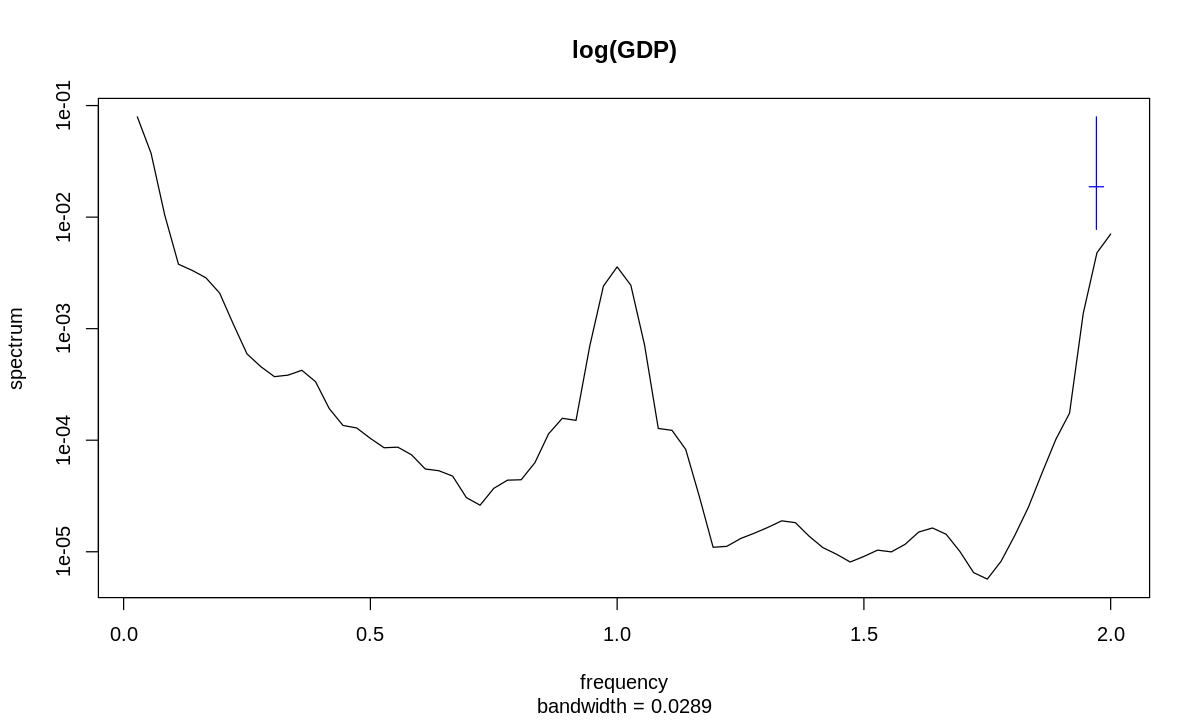

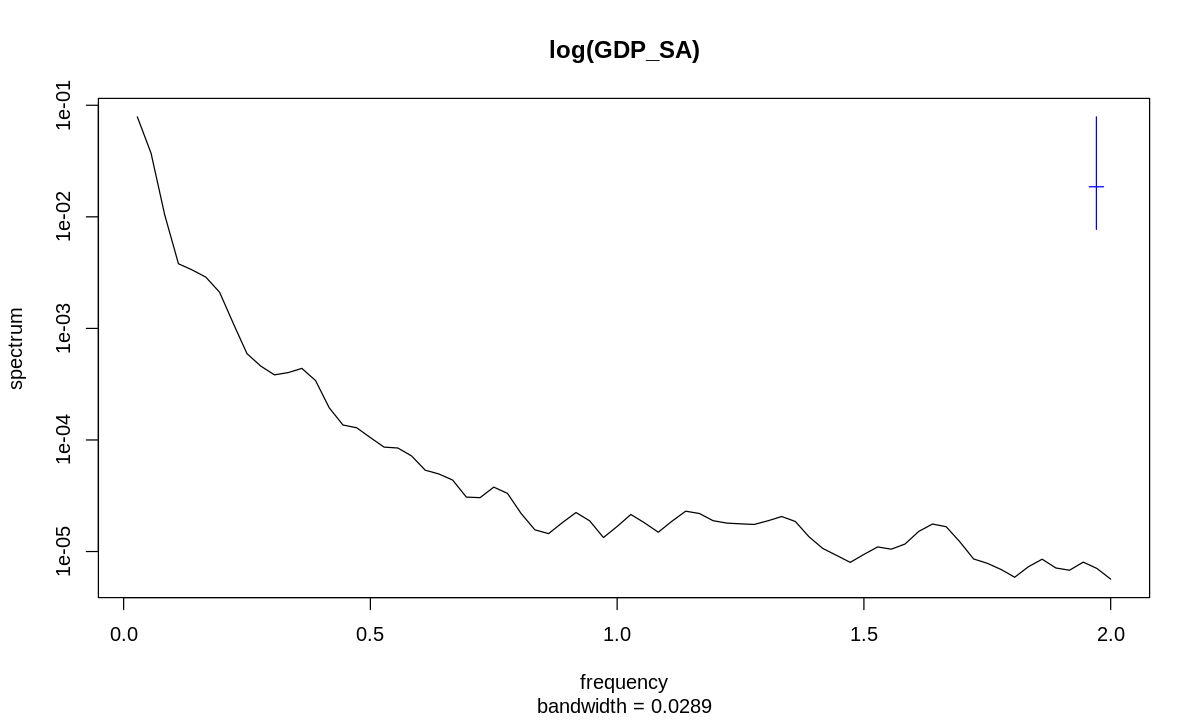

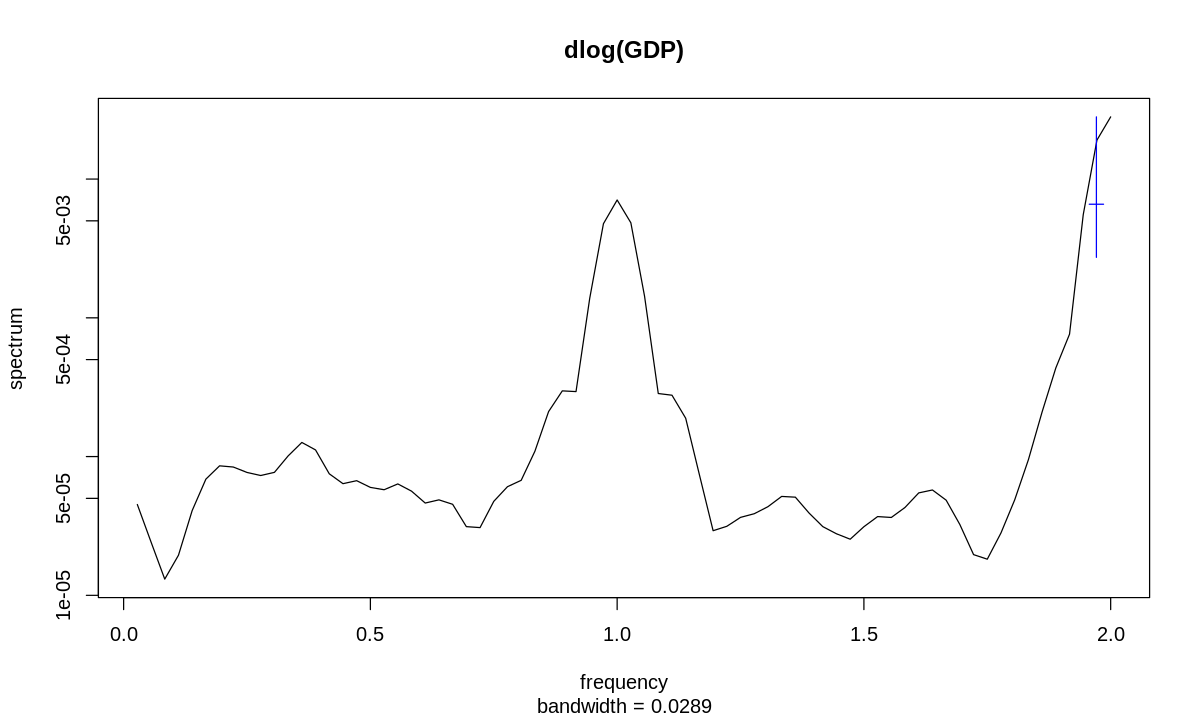

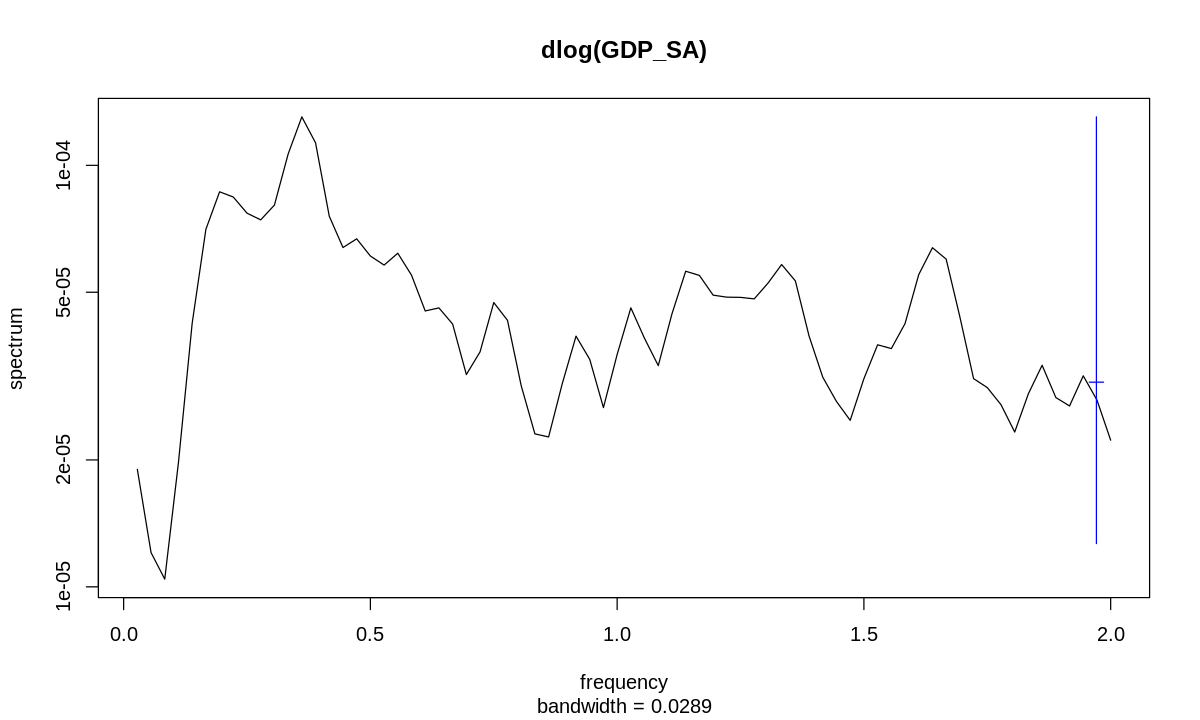

In [65]:
spectrum(log(GDP), spans=c(3,3), main="log(GDP)")
spectrum(log(GDP_SA), spans=c(3,3), main="log(GDP_SA)" )
spectrum(diff(log(GDP)), spans=c(3,3), main="dlog(GDP)")
spectrum(diff(log(GDP_SA)), spans=c(3,3), main="dlog(GDP_SA)")

## 7. 시계열의 분해

In [66]:
install.packages("mFilter")
library(mFilter)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [67]:
lgdp.hp = mFilter(log(GDP_SA),filter="HP")   # Hodrick-Prescott filter
 gdp_t = exp(lgdp.hp$trend)
 gdpsam = exp(ma(log(GDP_SA),3))
 gdp_s = GDP/GDP_SA*100
 gdp_i = GDP_SA/gdpsam*100
 gdp_c = gdpsam/gdp_t*100

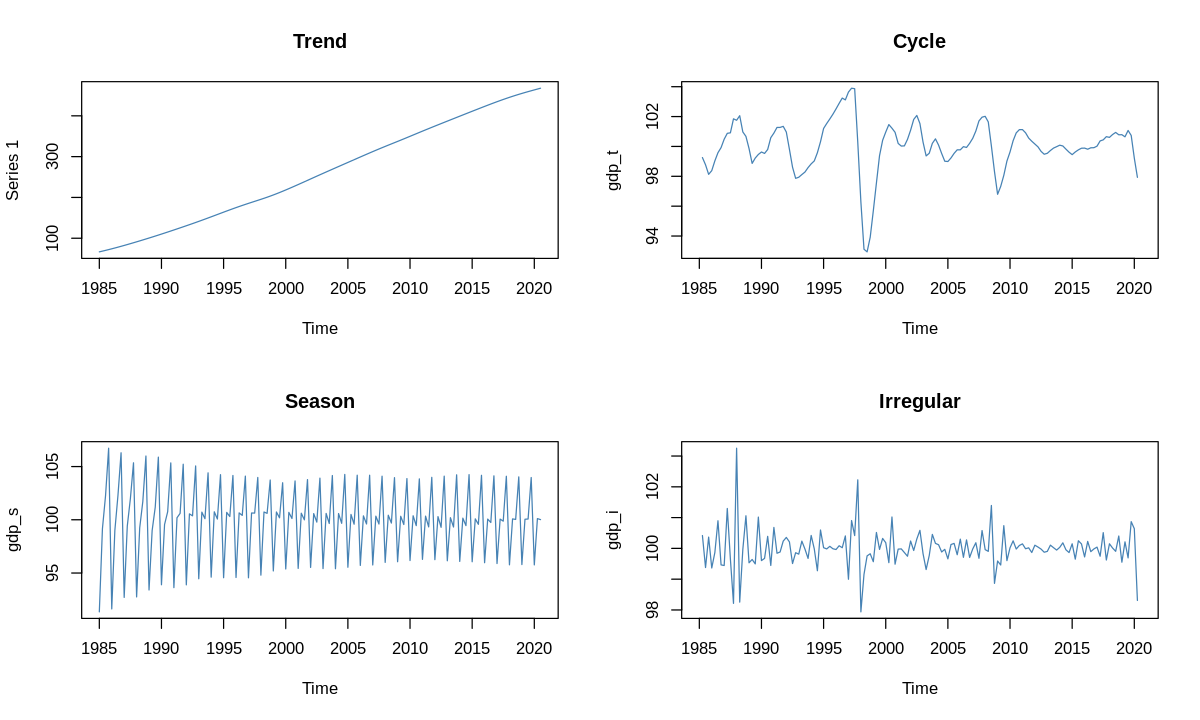

In [68]:
par(mfrow=c(2,2))
plot(gdp_t, main="Trend", col="steelblue")
plot(gdp_c, main="Cycle", col="steelblue")
plot(gdp_s, main="Season", col="steelblue")
plot(gdp_i, main="Irregular", col="steelblue")
par(mfrow=c(1,1))

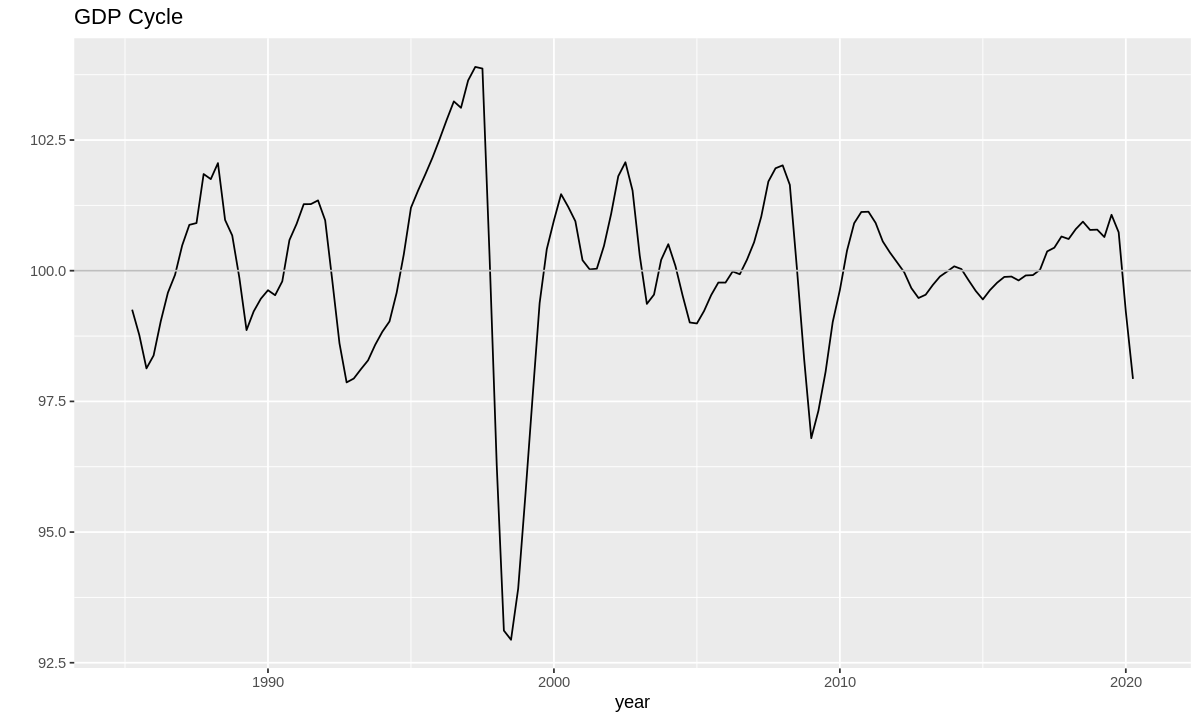

In [72]:
p <- autoplot(gdp_c)+ ggtitle("GDP Cycle") +
     ylab("") +  xlab("year")
p + geom_hline(yintercept = 100, color="gray")  

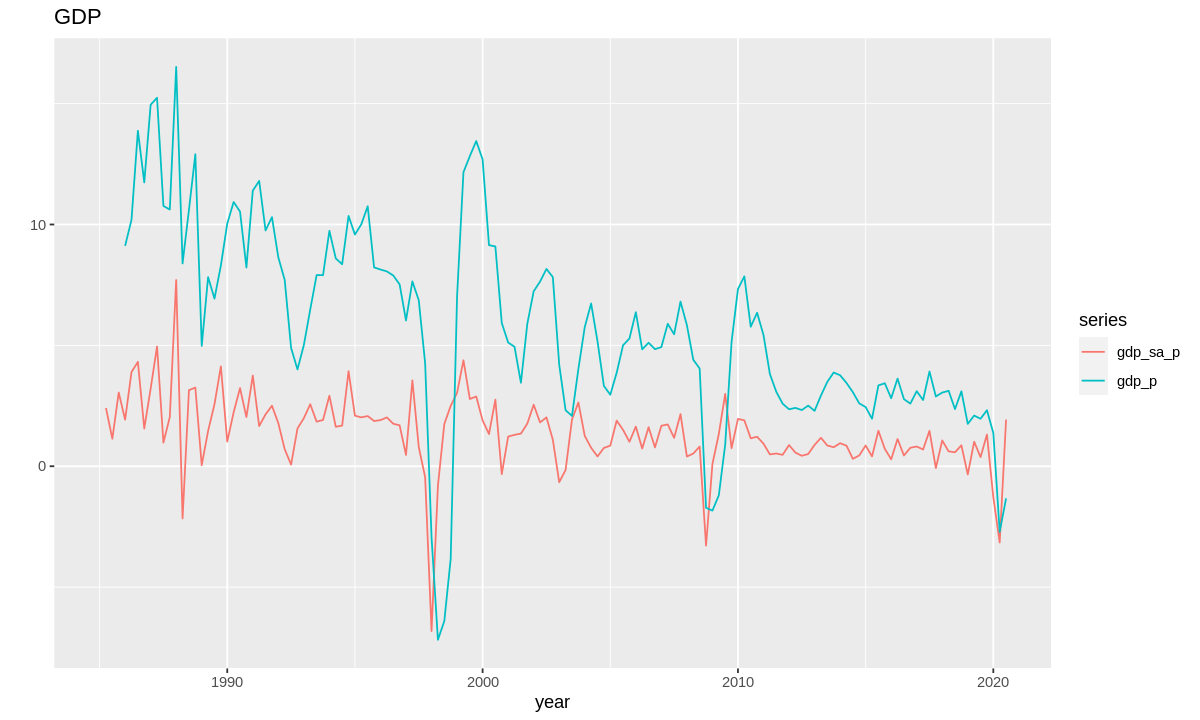

In [ ]:
autoplot(dataq_ts[, c(16,17)])+
  ggtitle("GDP") +
  ylab("") +
  xlab("year")

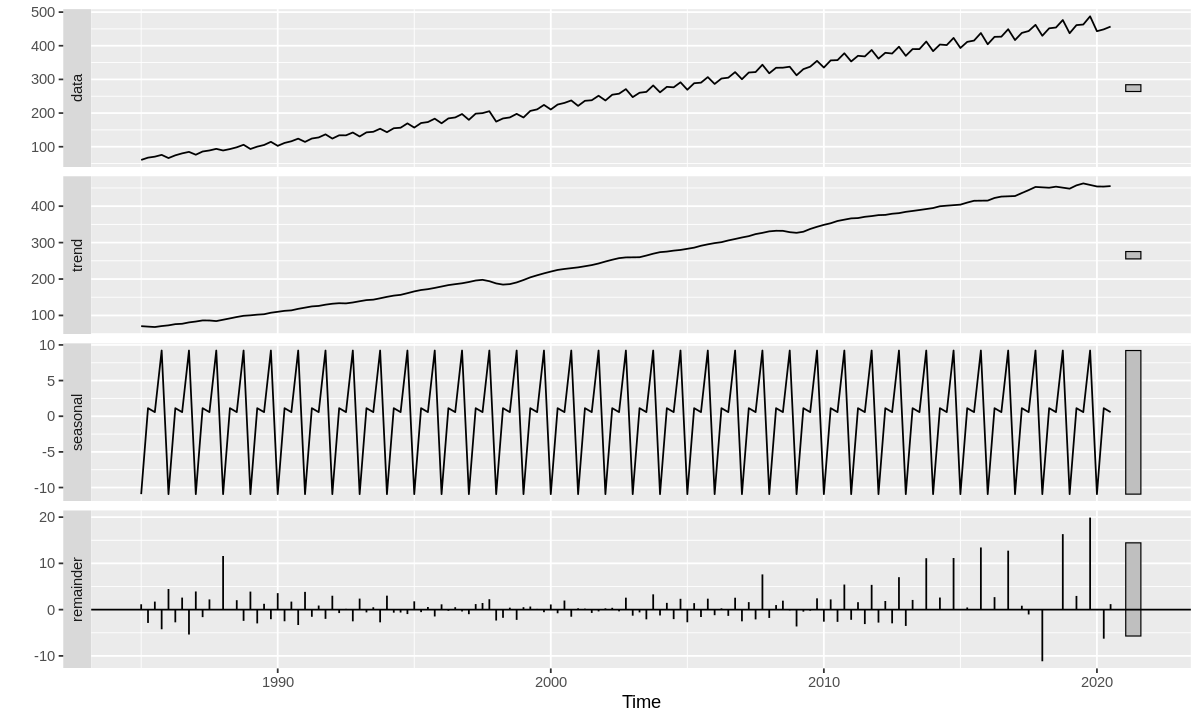

In [ ]:
GDP %>%
  stl(t.window=5, s.window="periodic", robust=TRUE) %>%
  autoplot()

## 8. 시계열 예측

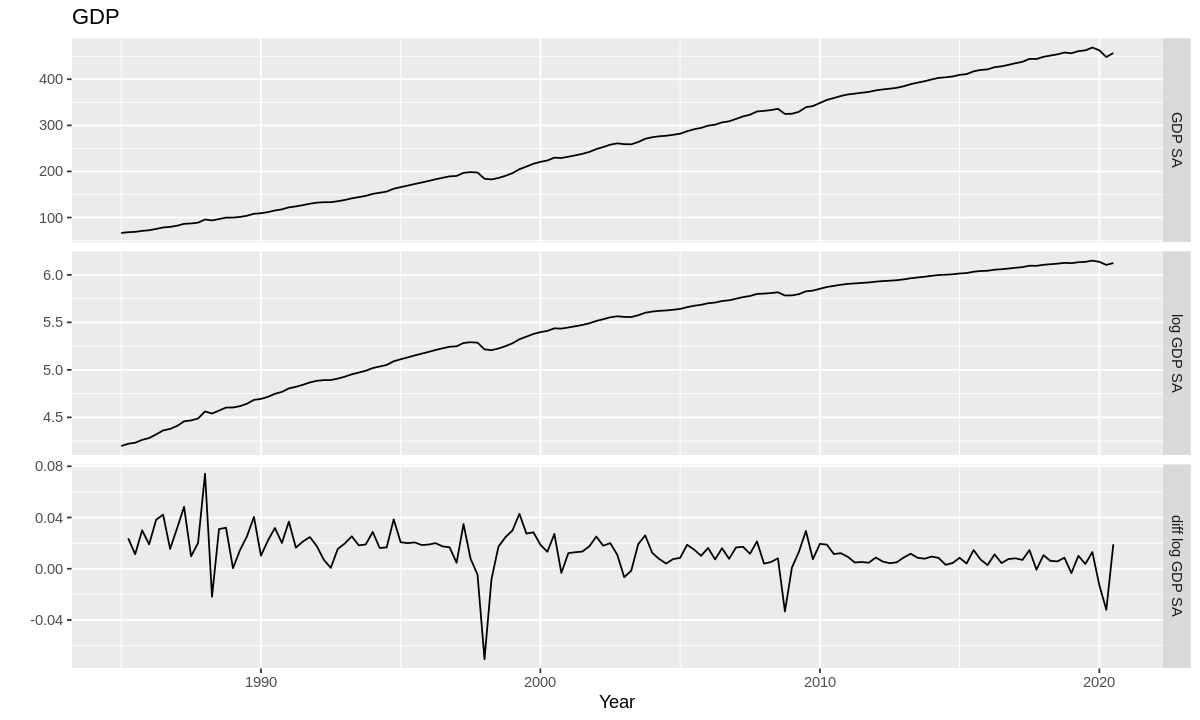

In [100]:
cbind("GDP SA" = GDP_SA,
      "log GDP SA" = log(GDP_SA),
      "diff log GDP SA" = diff(log(GDP_SA))) %>%
  autoplot(facets=TRUE) +
    xlab("Year") + ylab("") +
    ggtitle("GDP")

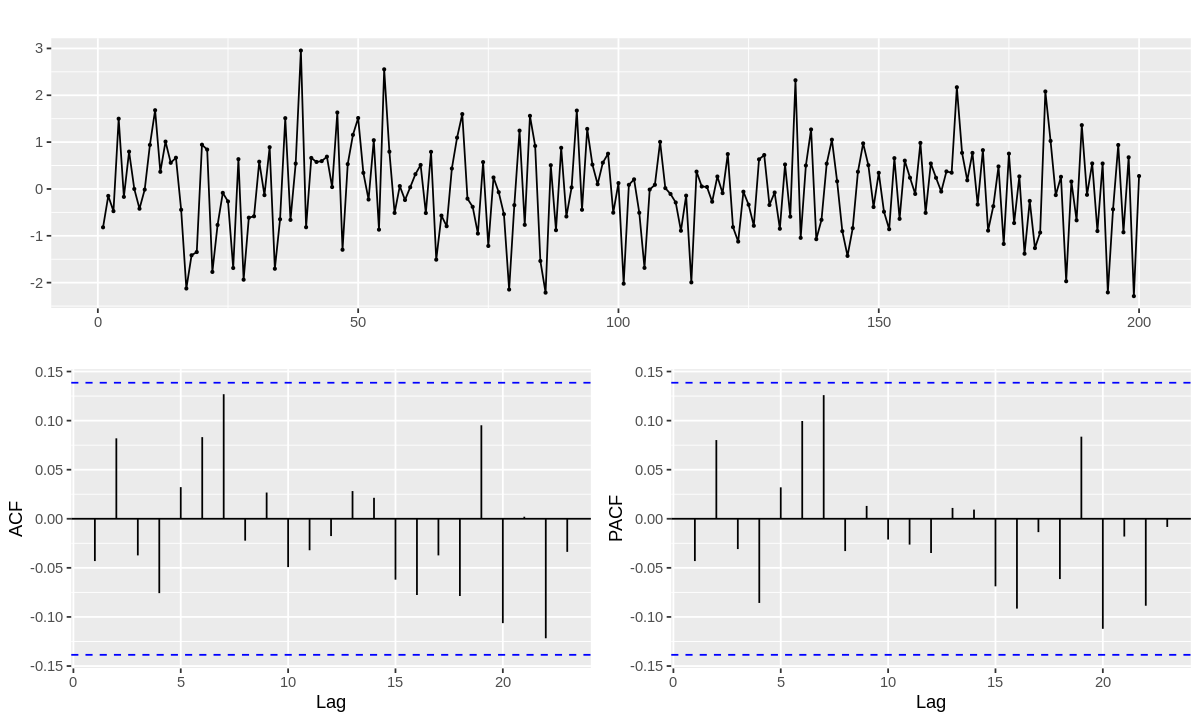

In [113]:
rnorm(200) %>% ggtsdisplay(main="")

In [87]:
gdp_sa_p = dataq_ts[, 16]
gdp_p = dataq_ts[, 17]

Warning message:
“Removed 1 rows containing missing values (geom_point).”


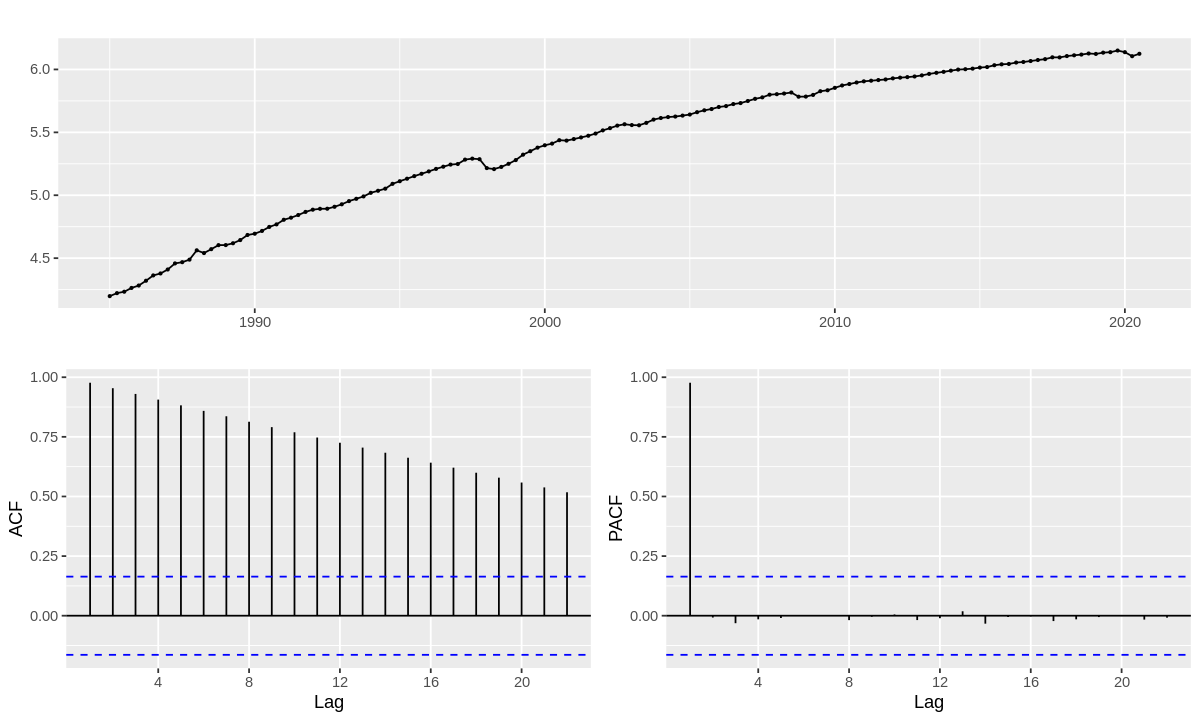

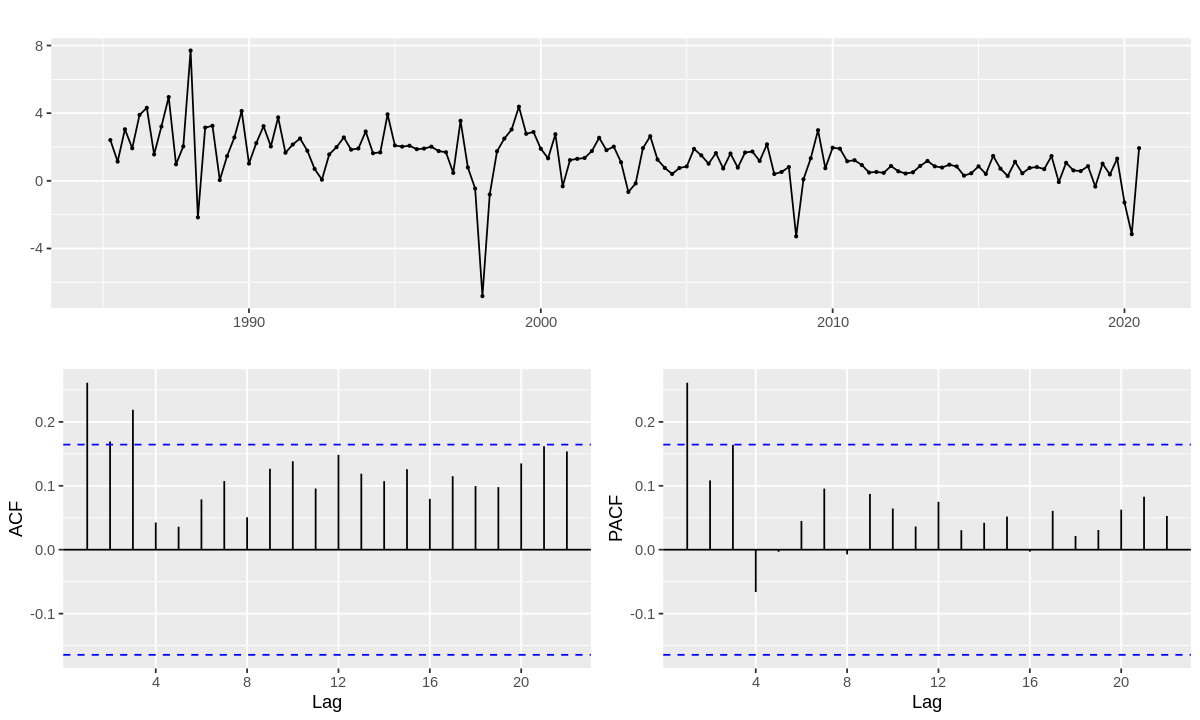

In [109]:
GDP_SA %>% log() %>% ggtsdisplay(main="")
gdp_sa_p %>% ggtsdisplay(main="")

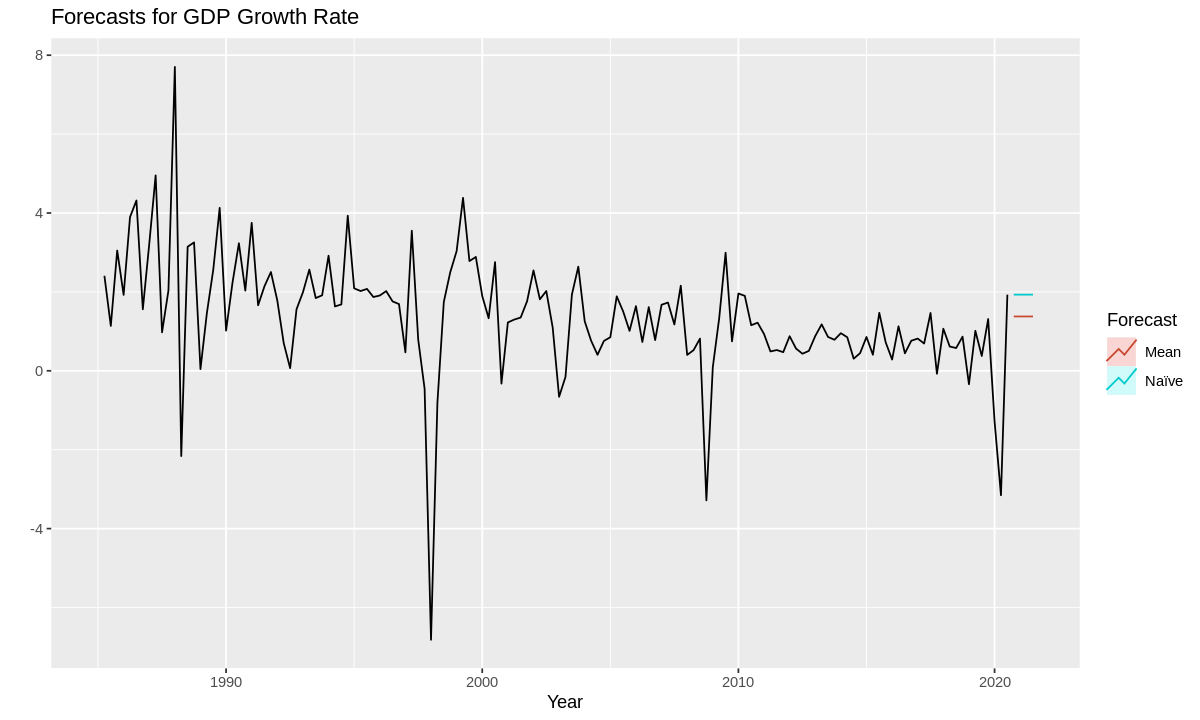

In [89]:
autoplot(gdp_sa_p) +
  autolayer(meanf(gdp_sa_p, h=4),  series="Mean", PI=FALSE) +
  autolayer(naive(gdp_sa_p, h=4),  series="Naïve", PI=FALSE) +
  #autolayer(snaive(gdp_sa_p, h=11),series="Seasonal naïve", PI=FALSE) +
  ggtitle("Forecasts for GDP Growth Rate") +
  xlab("Year") + ylab("") +
  guides(colour=guide_legend(title="Forecast"))

In [115]:
model1 = gdp_sa_p %>% auto.arima()
model1 %>% summary()

Series: . 
ARIMA(0,1,1)(0,0,1)[4] 

Coefficients:
          ma1     sma1
      -0.9110  -0.1973
s.e.   0.0344   0.0965

sigma^2 estimated as 2.03:  log likelihood=-250.1
AIC=506.2   AICc=506.38   BIC=515.05

Training set error measures:
                     ME     RMSE       MAE       MPE     MAPE      MASE
Training set -0.2099526 1.409755 0.8611641 -34.40492 120.9819 0.6349027
                   ACF1
Training set 0.04714119



	Ljung-Box test

data:  Residuals from ARIMA(0,1,1)(0,0,1)[4]
Q* = 9.0768, df = 6, p-value = 0.1693

Model df: 2.   Total lags used: 8



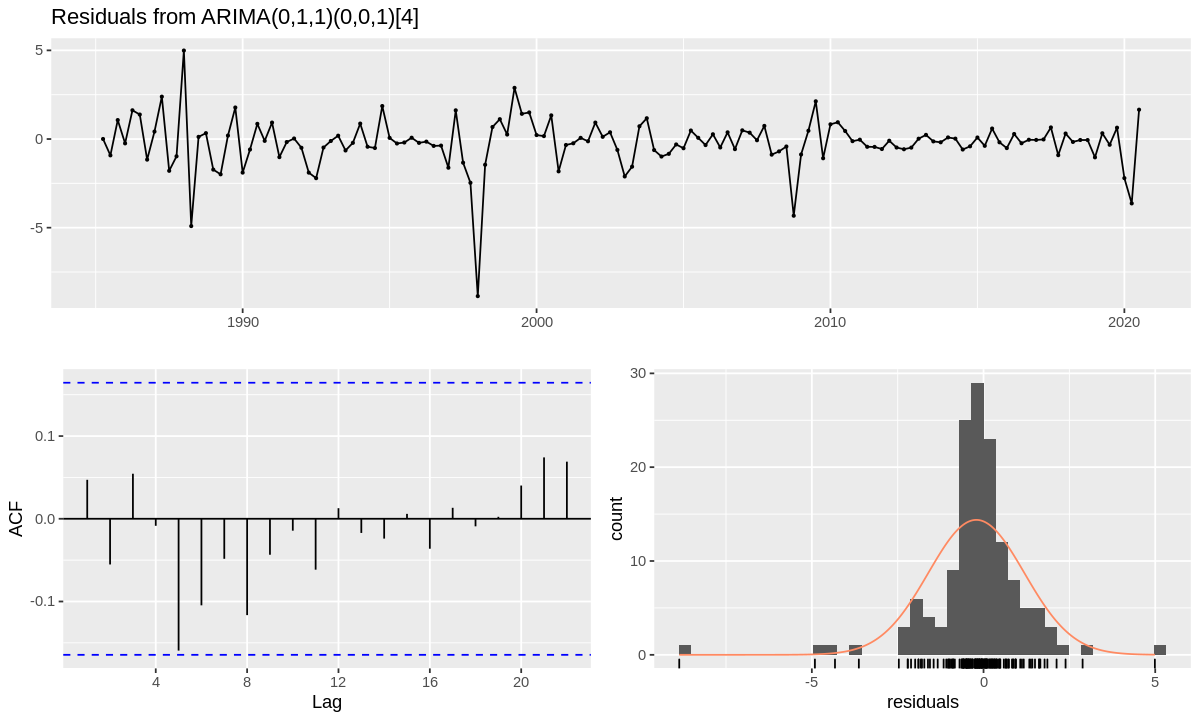

In [116]:
model1 %>% checkresiduals()

Warning message:
“Removed 1 row(s) containing missing values (geom_path).”


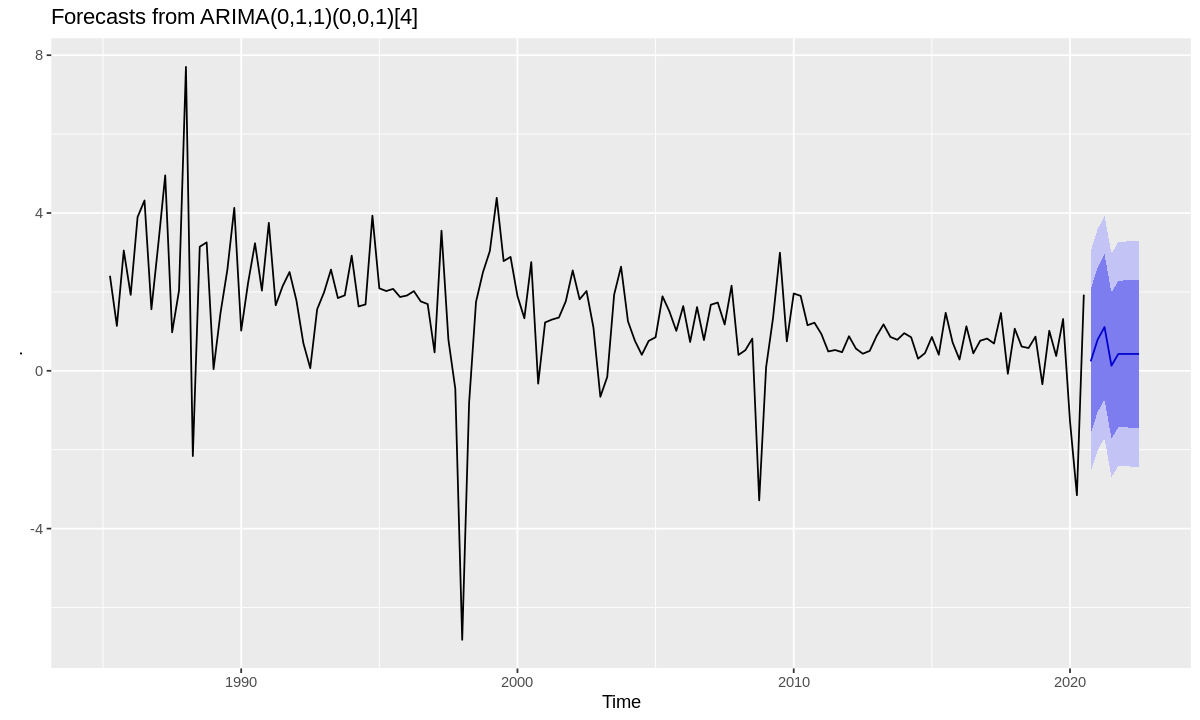

In [120]:
model1 %>% forecast() %>% autoplot() 

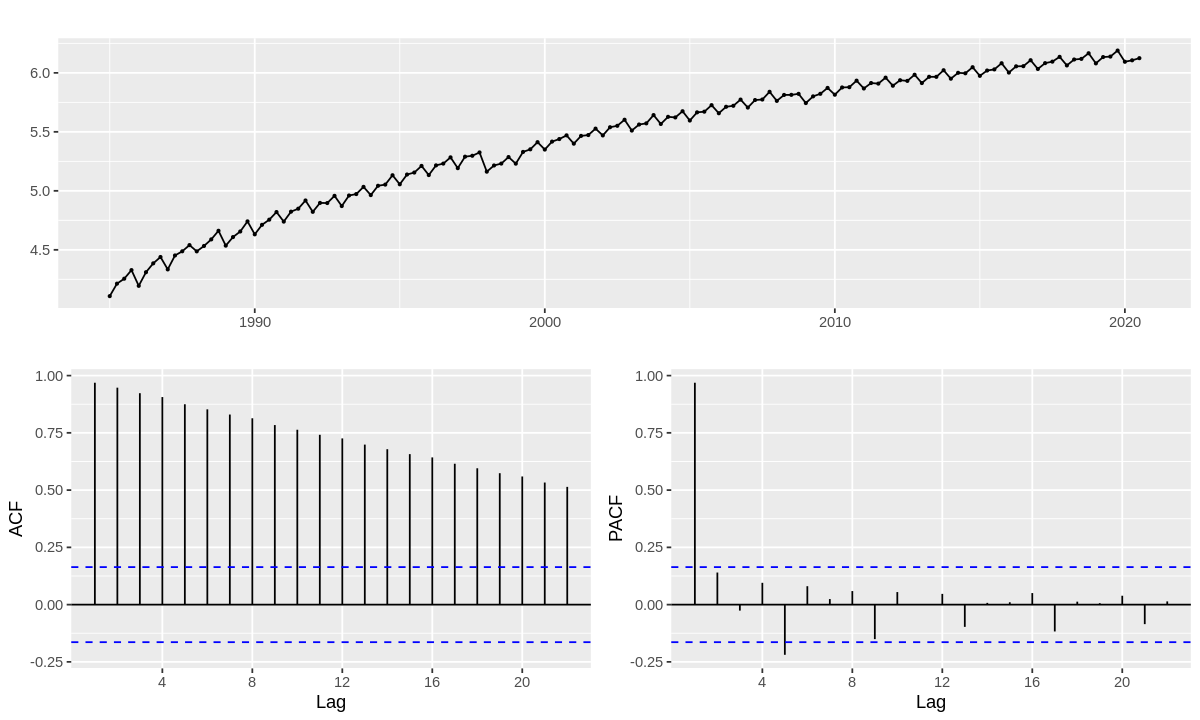

In [114]:
 GDP %>% log() %>% ggtsdisplay(main="")

In [129]:
model2 = GDP %>% auto.arima()
model2 %>% summary()

Series: . 
ARIMA(3,0,0)(0,1,1)[4] with drift 

Coefficients:
         ar1      ar2      ar3     sma1   drift
      0.9654  -0.0526  -0.2064  -0.4538  2.8373
s.e.  0.0838   0.1272   0.0932   0.0898  0.1484

sigma^2 estimated as 13.9:  log likelihood=-378.79
AIC=769.58   AICc=770.22   BIC=787.19

Training set error measures:
                      ME     RMSE      MAE        MPE     MAPE      MASE
Training set -0.01279307 3.608876 2.411035 -0.1616095 1.104595 0.1958816
                    ACF1
Training set 0.001399999



	Ljung-Box test

data:  Residuals from ARIMA(3,0,0)(0,1,1)[4] with drift
Q* = 0.85602, df = 3, p-value = 0.836

Model df: 5.   Total lags used: 8



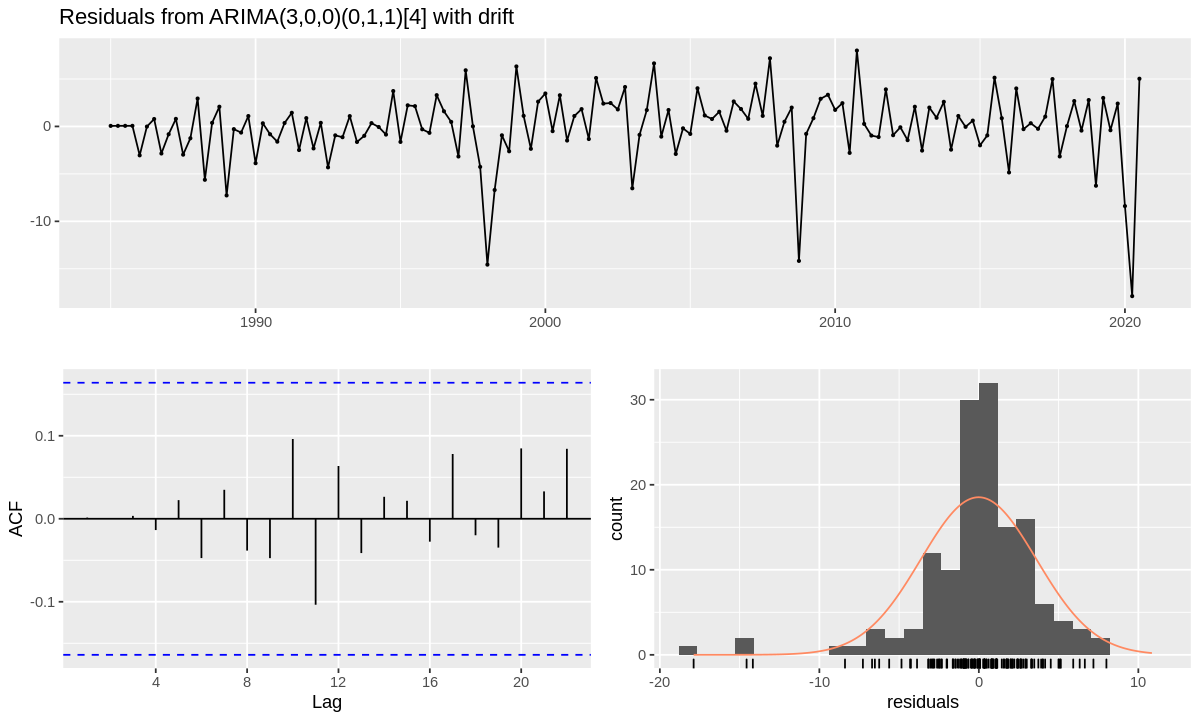

In [130]:
model2 %>% checkresiduals()

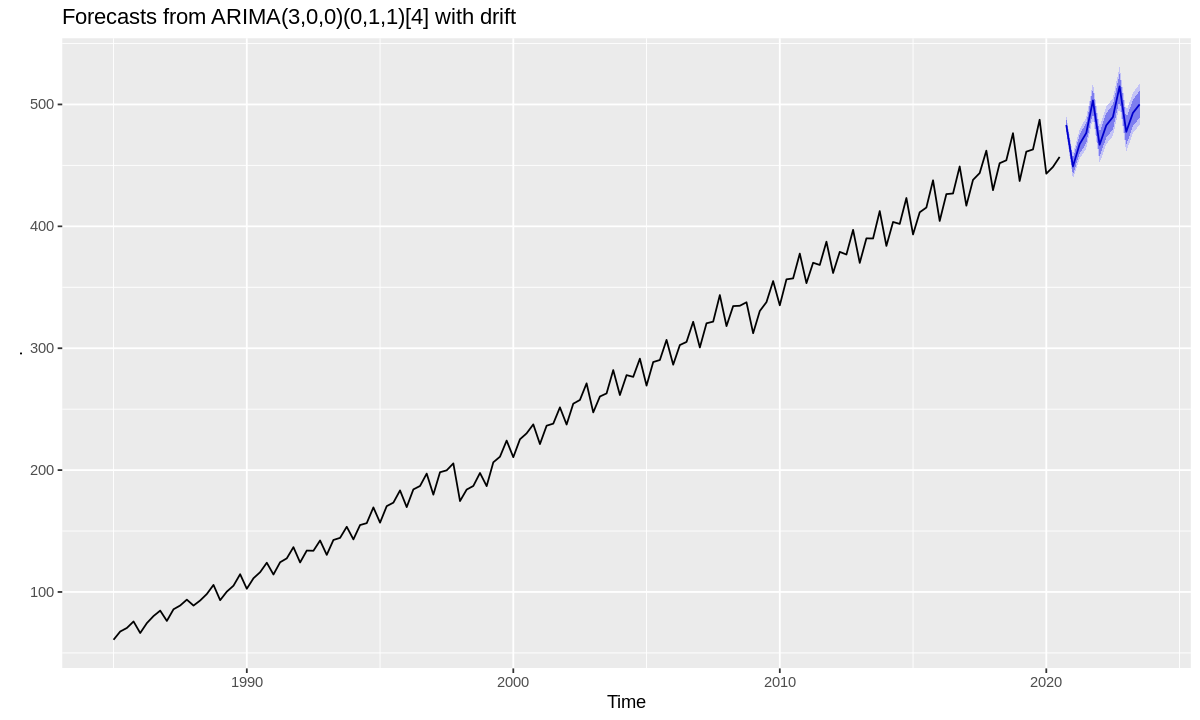

In [131]:
model2 %>% forecast(h=12) %>% autoplot() 

## GAPMINDER 데이터

In [ ]:
library(modelr)

In [ ]:
install.packages("gapminder")
library(gapminder)
gapminder


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134
Afghanistan,Asia,1982,39.854,12881816,978.0114
Afghanistan,Asia,1987,40.822,13867957,852.3959
Afghanistan,Asia,1992,41.674,16317921,649.3414


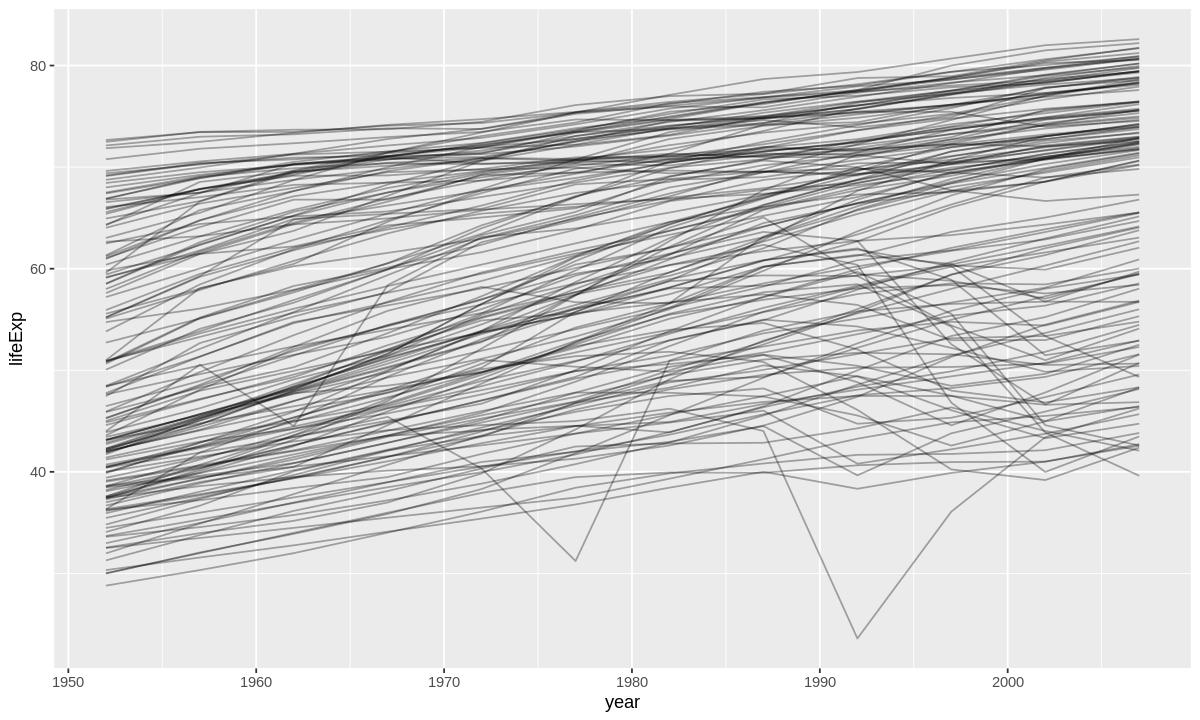

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 6)
gapminder %>% 
  ggplot(aes(year, lifeExp, group = country)) +
    geom_line(alpha = 1/3)

In [ ]:
kr <- filter(gapminder, country == "Korea, Rep.")
kr

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
"Korea, Rep.",Asia,1952,47.453,20947571,1030.592
"Korea, Rep.",Asia,1957,52.681,22611552,1487.594
"Korea, Rep.",Asia,1962,55.292,26420307,1536.344
"Korea, Rep.",Asia,1967,57.716,30131000,2029.228
"Korea, Rep.",Asia,1972,62.612,33505000,3030.877
"Korea, Rep.",Asia,1977,64.766,36436000,4657.221
"Korea, Rep.",Asia,1982,67.123,39326000,5622.942
"Korea, Rep.",Asia,1987,69.810,41622000,8533.089
"Korea, Rep.",Asia,1992,72.244,43805450,12104.279


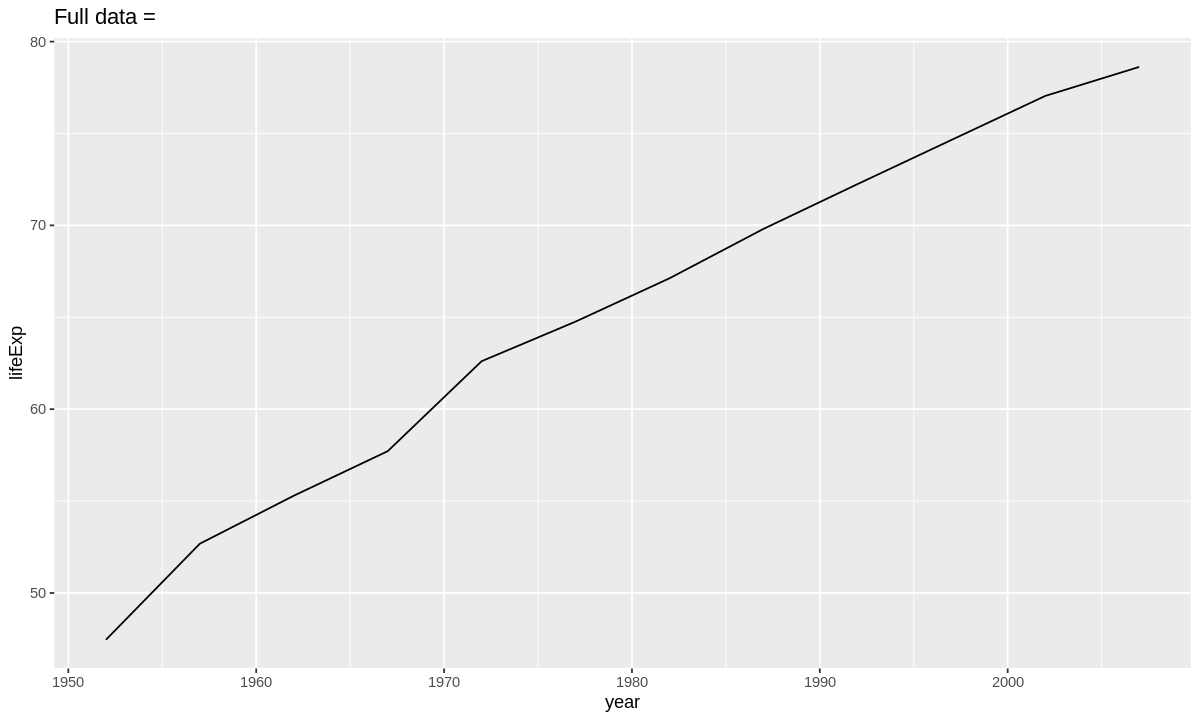

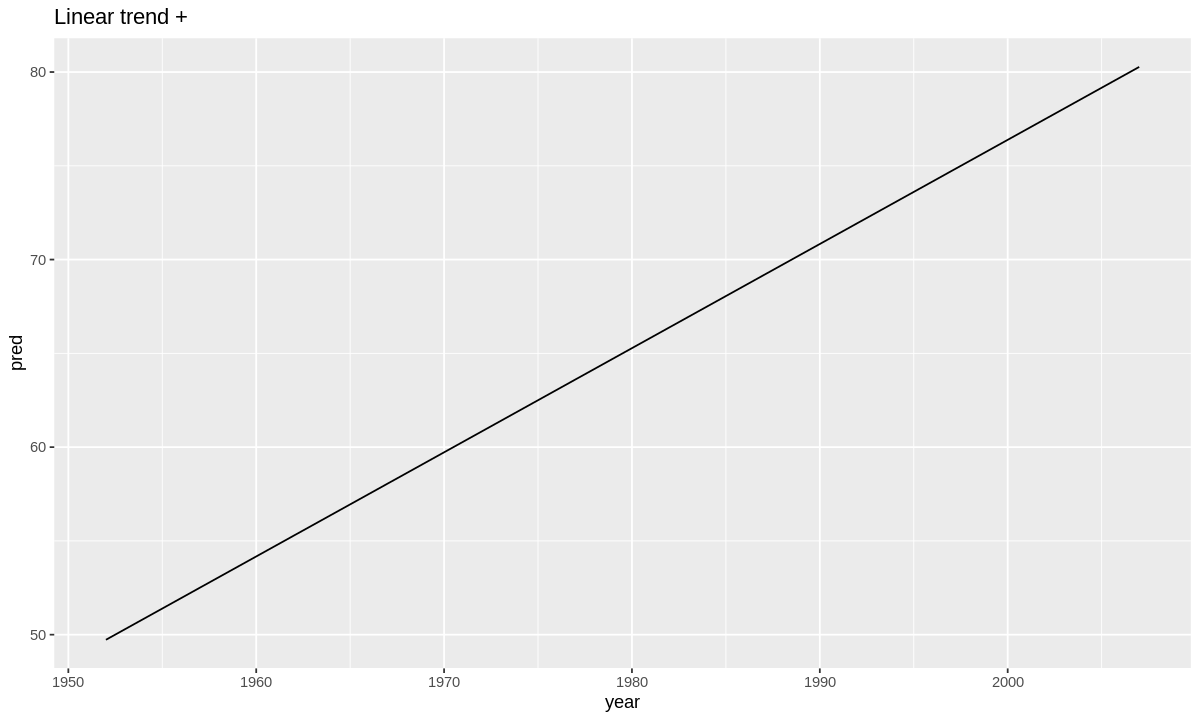

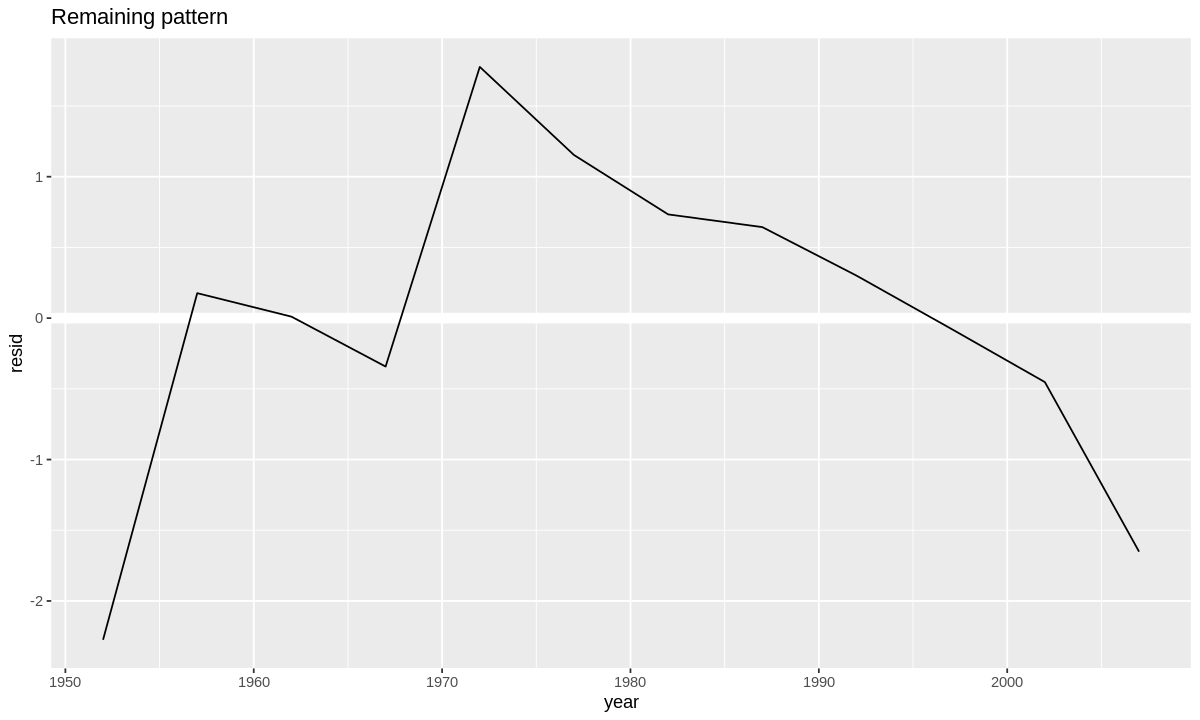

In [ ]:
kr %>% 
  ggplot(aes(year, lifeExp)) + 
  geom_line() + 
  ggtitle("Full data = ")

kr_mod <- lm(lifeExp ~ year, data = kr)
kr %>% 
  add_predictions(kr_mod) %>%
  ggplot(aes(year, pred)) + 
  geom_line() + 
  ggtitle("Linear trend + ")

kr %>% 
  add_residuals(kr_mod) %>% 
  ggplot(aes(year, resid)) + 
  geom_hline(yintercept = 0, colour = "white", size = 3) + 
  geom_line() + 
  ggtitle("Remaining pattern")

In [16]:
by_country <- gapminder %>% 
  group_by(country, continent) %>% 
  nest()

In [18]:
country_model <- function(df) {
  lm(lifeExp ~ year, data = df)
}

In [19]:
models <- map(by_country$data, country_model)

In [20]:
by_country <- by_country %>% 
  mutate(model = map(data, country_model))

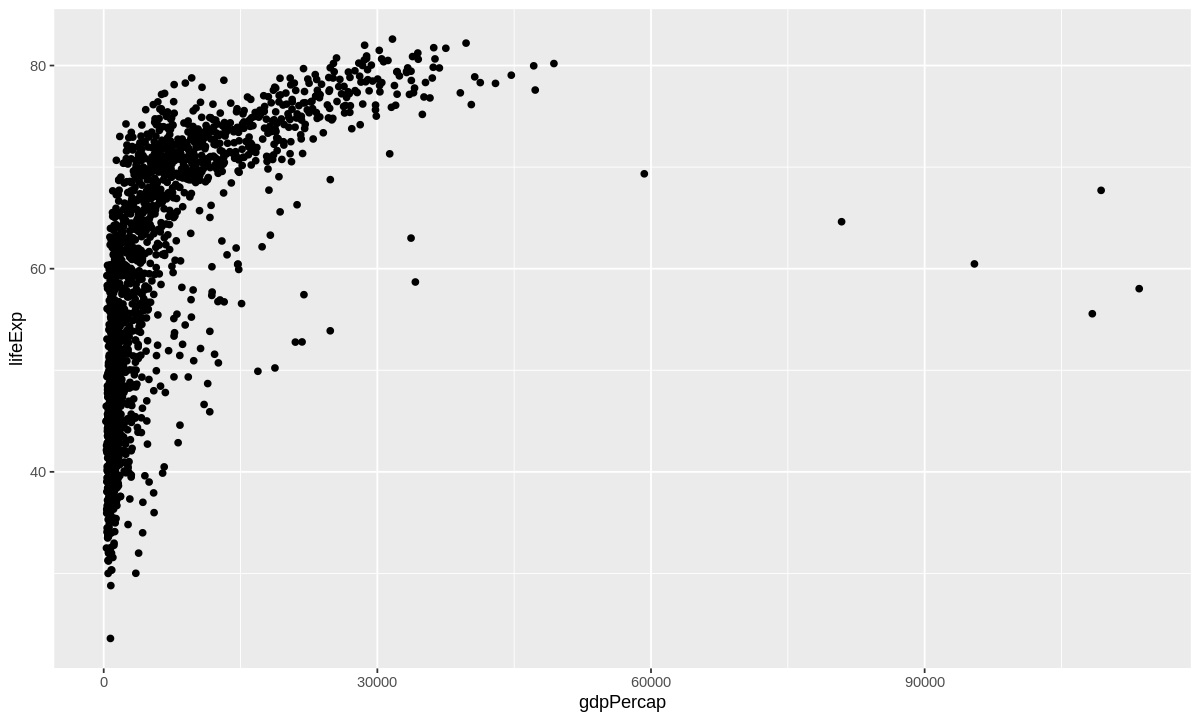

In [25]:
ggplot(data=gapminder) +
   geom_point(aes(gdpPercap, lifeExp))

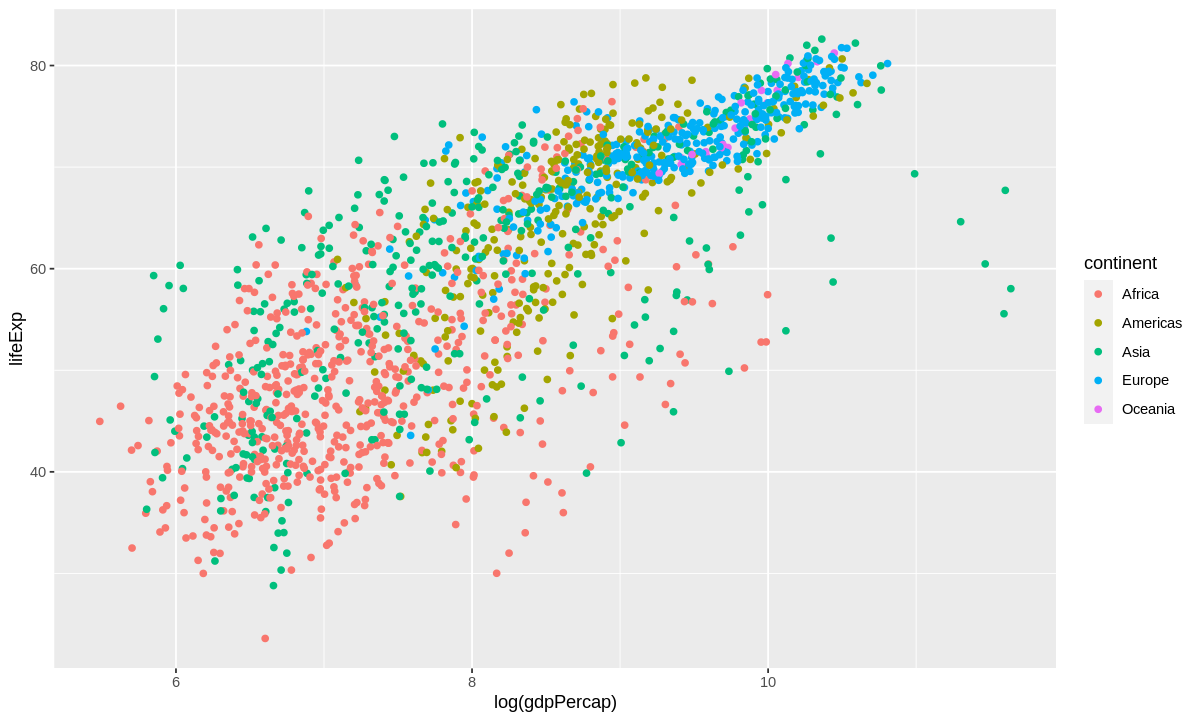

In [24]:
ggplot(data=gapminder) +
   geom_point(aes(log(gdpPercap), lifeExp, color=continent))

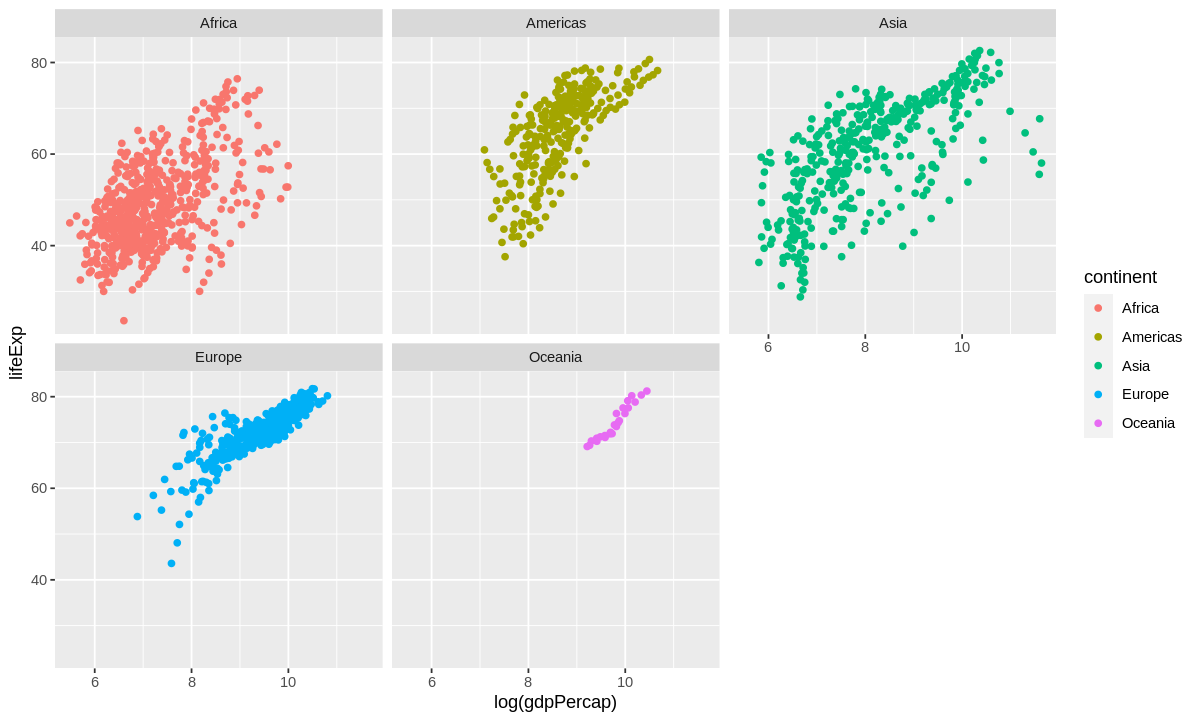

In [27]:
ggplot(data=gapminder) +
   geom_point(aes(log(gdpPercap), lifeExp, color=continent)) +
   facet_wrap(~continent, nrow=2)